# refferences 
dataset = https://www.tensorflow.org/tutorials/load_data/images

train_resnet50 = https://gist.github.com/PatWie/b6e62847e8997f7f30f26ac50175d352

https://www.codecademy.com/learn/deep-learning-with-tensor-flow-image-classification/modules/image-classification-deep-learning-with-tensorflow/cheatsheet

https://medium.com/@nutanbhogendrasharma/image-classification-with-resnet50-model-12f4c79c216b

# explore all the steps fully

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.device("GPU")

In [3]:
data_dir = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test"

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 624 files belonging to 2 classes.
Using 500 files for training.


In [87]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 624 files belonging to 2 classes.
Using 124 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


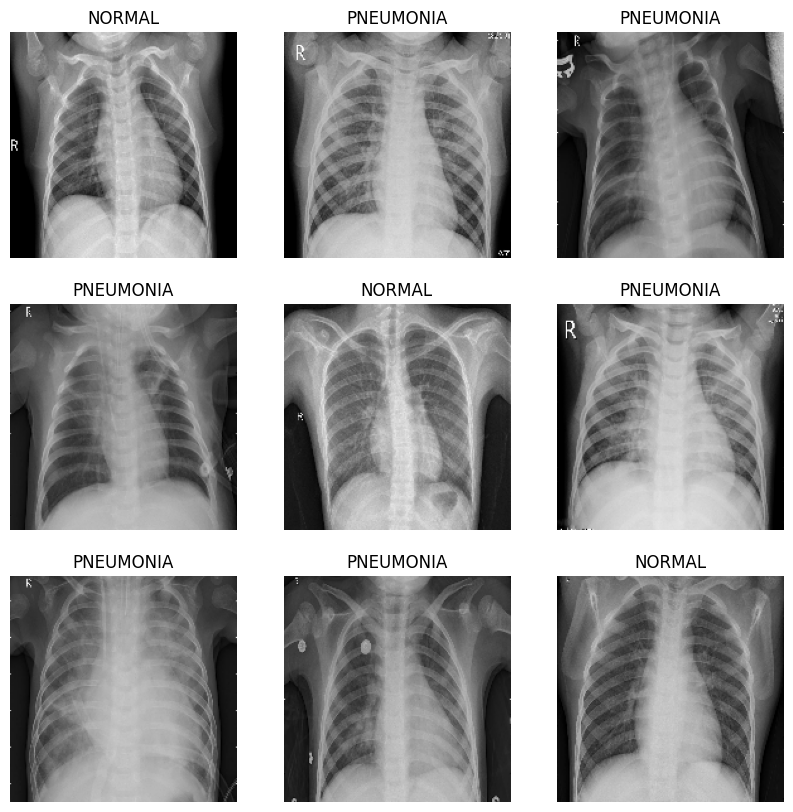

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [90]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [91]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [92]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1,input_shape=(180,180,3), activation='relu'),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [9]:
model.compile(
  optimizer='adam',
  loss="binary_crossentropy",
  metrics=['accuracy'])

In [10]:
model.fit(
  train_ds,
  epochs=3
)

Epoch 1/3
16/16 [==============================] - 14s 197ms/step - loss: 1.5655 - accuracy: 0.6160
Epoch 2/3
16/16 [==============================] - 3s 80ms/step - loss: 0.7031 - accuracy: 0.4760
Epoch 3/3
16/16 [==============================] - 3s 85ms/step - loss: 0.6674 - accuracy: 0.4560


In [96]:
model.save("mini_model.h5")

In [24]:
model.save("new_model.h5")

In [25]:
load_model = tf.keras.models.load_model("new_model.h5")

In [26]:
import cv2
import matplotlib.pyplot as plt
img = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\val\NORMAL\NORMAL2-IM-1427-0001.jpeg"
img = plt.imread(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

In [27]:
img.shape

(1416, 1776, 3)

In [28]:
resize_img = tf.image.resize(img, tf.constant([180,180]))

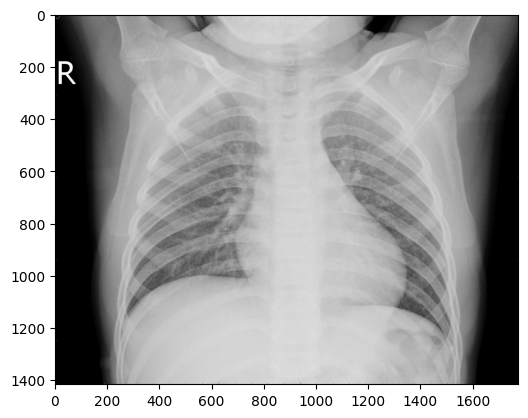

In [29]:
plt.imshow(img)

In [30]:
resize_img.shape

TensorShape([180, 180, 3])

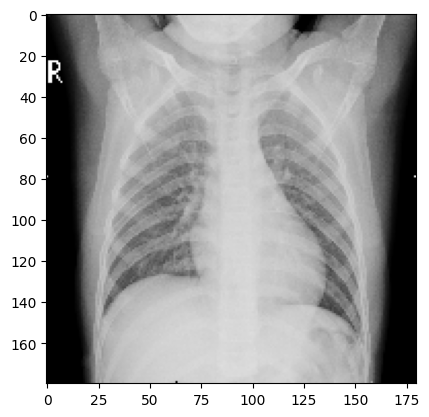

In [31]:
plt.imshow(np.array(resize_img,np.int32));

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


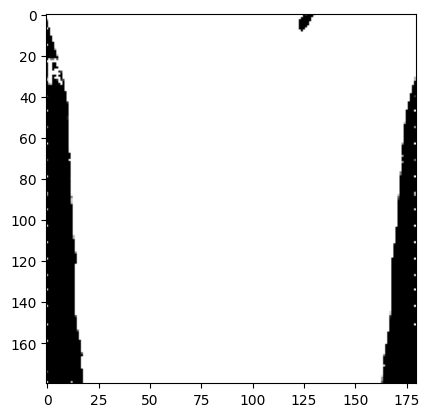

In [32]:
plt.imshow(resize_img);

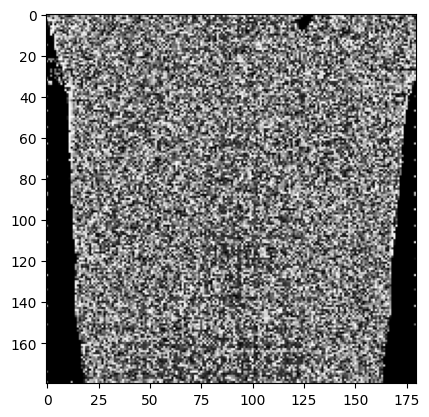

In [33]:
plt.imshow((np.array(resize_img)* 255).astype(np.uint8))

In [34]:
new = np.array(resize_img,np.int32)
new.shape

(180, 180, 3)

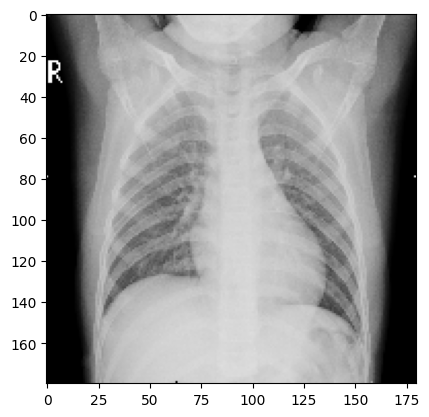

In [41]:
plt.imshow(new);

In [35]:
load_model.predict(new)

ValueError: in user code:

    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 180, 180, 3), found shape=(None, 180, 3)


In [36]:
input_shape = (180, 180,3)

model = tf.keras.applications.resnet.ResNet50(
    input_shape =input_shape,
    include_top=True,
    weights=None)

In [37]:
model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy'])

In [39]:
model.fit(train_ds,epochs=3)

Epoch 1/3


ValueError: in user code:

    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\losses.py", line 1932, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\backend.py", line 5247, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1000) vs (None, 1)).


# ImageDataGenerator

In [16]:
training_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/225)

training_iterator = training_data_generator.flow_from_directory(r"D:\ml\pneumonia_detection\data") # class_mode="categorical", color_mode="rgb", target_size=(256,256), batch_size=8


Found 624 images belonging to 2 classes.


In [17]:
training_iterator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [18]:
training_iterator.image_shape

(256, 256, 3)

In [19]:
input_shape = training_iterator.image_shape

model = tf.keras.applications.resnet.ResNet50(
    input_shape =input_shape,
    include_top=True,
    weights=None)

In [20]:
model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=['accuracy'])

# run the above code in google colab the model is larger then the gpu capacity

In [21]:
model.fit(training_iterator,epochs=3)

Epoch 1/3


ResourceExhaustedError: Graph execution error:

Detected at node 'resnet50/conv2_block3_1_conv/Conv2D' defined at (most recent call last):
    File "d:\ml\pneumonia_detection\venv\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "d:\ml\pneumonia_detection\venv\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "d:\ml\pneumonia_detection\venv\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "d:\ml\pneumonia_detection\venv\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "d:\ml\pneumonia_detection\venv\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\ipykernel\ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\ipykernel\ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\nites\AppData\Local\Temp\ipykernel_19676\1549762620.py", line 1, in <module>
      model.fit(training_iterator,epochs=3)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\layers\convolutional.py", line 248, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\layers\convolutional.py", line 233, in convolution_op
      return tf.nn.convolution(
Node: 'resnet50/conv2_block3_1_conv/Conv2D'
OOM when allocating tensor with shape[32,64,64,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node resnet50/conv2_block3_1_conv/Conv2D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_39041]

# vgg19

In [9]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [10]:
img_path = r"D:\ml\pneumonia_detection\data\NORMAL\IM-0001-0001.jpeg"

img = plt.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [11]:
img.shape

(1317, 1857, 3)

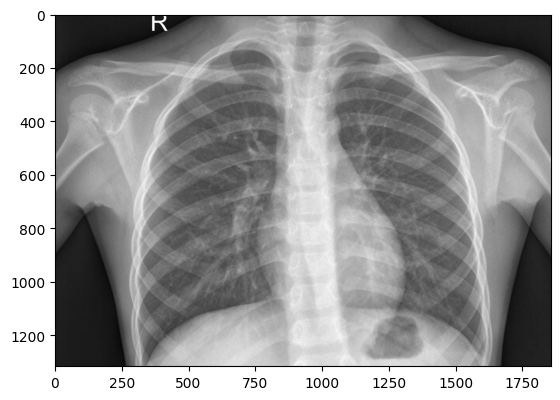

In [12]:
plt.imshow(img);

In [15]:
resize_img  =cv2.resize(img , (224, 224))

In [17]:
resize_img.shape

(224, 224, 3)

In [23]:
plt.imsave("resize_img.jpeg", resize_img)

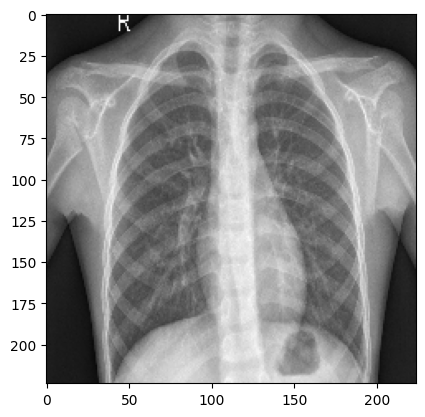

In [16]:
plt.imshow(resize_img)

In [24]:
data_dir = r"D:\ml\pneumonia_detection\data"

training_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1.0/225))

training_iterator = training_data_generator.flow_from_directory(data_dir,class_mode="categorical", color_mode="rgb", target_size=(224,224), interpolation='nearest', batch_size=8) # interpolation=cv2.INTER_AREA

Found 624 images belonging to 2 classes.


In [25]:
training_iterator.num_classes

2

In [26]:
training_iterator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [27]:
training_iterator.image_shape

(224, 224, 3)

In [28]:
model = tf.keras.applications.VGG19(
    input_shape=training_iterator.image_shape,
    weights="imagenet",
    include_top = False)

80150528/80134624 [==============================] - 25s 0us/step


In [30]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=["accuracy"])

In [38]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [39]:
model.fit(training_iterator, epochs=1)

ValueError: in user code:

    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, None) and (None, 7, 7, 512) are incompatible


In [ ]:
model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
model.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
flatten_in = tf.keras.layers.Flatten()(model.output)

prediction = tf.keras.layers.Dense(
    units=2,
    activation="softmax"
)(flatten_in)

In [42]:
full_model = tf.keras.models.Model(
    inputs=model.input,
    outputs=prediction
)

full_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [43]:
full_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [44]:
full_model.output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense')>

In [45]:
full_model.fit(training_iterator,epochs=1)

78/78 [==============================] - 42s 369ms/step - loss: nan - accuracy: 0.4135


In [46]:
full_model.save("vgg19.h5")

In [50]:
loaded_model = tf.keras.models.load_model("vgg19.h5")

In [68]:
loaded_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [66]:
resize_img.shape

(224, 224, 3)

# expand the dimension for batch

In [78]:
new = np.expand_dims(resize_img, axis=0)

In [79]:
new.shape

(1, 224, 224, 3)

In [80]:
loaded_model.predict(new)

array([[nan, nan]], dtype=float32)

In [75]:
training_iterator[0][0][0].shape

(224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


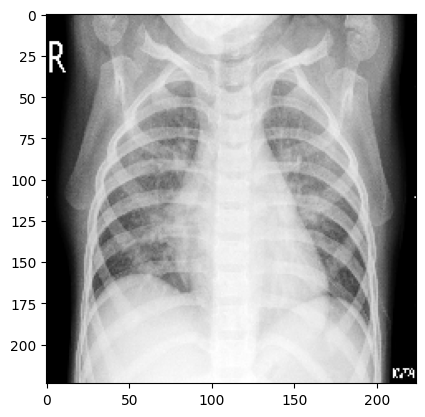

In [76]:
plt.imshow(training_iterator[0][0][0])

In [81]:
loaded_model.predict(np.expand_dims(training_iterator[0][0][0], axis=0))

array([[nan, nan]], dtype=float32)

# train model for multiple epochs with gpu

In [82]:
# use gpu
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [109]:
with tf.device("GPU:0"):
    full_model.fit(training_iterator,epochs=10)

Epoch 1/10
78/78 [==============================] - 23s 290ms/step - loss: nan - accuracy: 0.3750
Epoch 2/10
78/78 [==============================] - 24s 305ms/step - loss: nan - accuracy: 0.3750
Epoch 3/10
78/78 [==============================] - 26s 336ms/step - loss: nan - accuracy: 0.3750
Epoch 4/10
78/78 [==============================] - 26s 335ms/step - loss: nan - accuracy: 0.3750
Epoch 5/10
78/78 [==============================] - 26s 335ms/step - loss: nan - accuracy: 0.3750
Epoch 6/10
78/78 [==============================] - 26s 335ms/step - loss: nan - accuracy: 0.3750
Epoch 7/10
78/78 [==============================] - 26s 335ms/step - loss: nan - accuracy: 0.3750
Epoch 8/10
78/78 [==============================] - 26s 335ms/step - loss: nan - accuracy: 0.3750
Epoch 9/10
78/78 [==============================] - 26s 335ms/step - loss: nan - accuracy: 0.3750
Epoch 10/10
78/78 [==============================] - 26s 335ms/step - loss: nan - accuracy: 0.3750


In [84]:
full_model.save("vgg19_epoch_10.h5")

In [85]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [86]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [96]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.get_device_details(physical_devices[0])

{'device_name': 'NVIDIA GeForce GTX 1650', 'compute_capability': (7, 5)}

In [108]:
tf.test.gpu_device_name()


'/device:GPU:0'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
path = r"D:\ml\pneumonia_detection\data\NORMAL\IM-0001-0001.jpeg"

img = plt.imread(path)

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

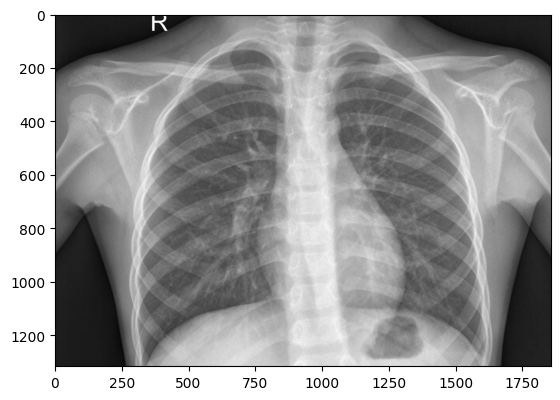

In [7]:
plt.imshow(img);

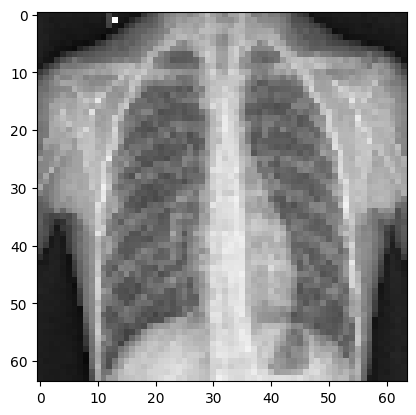

In [20]:
resize_img = cv2.resize(img, (64,64))
plt.imshow(resize_img);

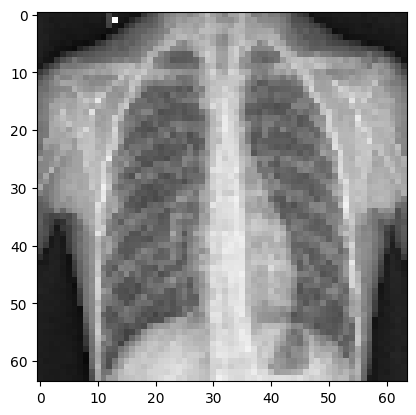

In [23]:
resize_img = cv2.resize(img, (64,64))
plt.imshow(resize_img); 

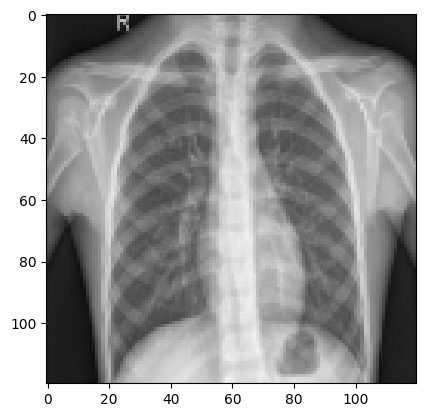

In [27]:
resize_img = cv2.resize(img, (120,120), interpolation = cv2.INTER_AREA)
plt.imshow(resize_img); 

In [28]:
import tensorflow as tf

In [29]:
load_model =tf.keras.models.load_model("vgg19.h5")

In [30]:
new = np.expand_dims(resize_img, axis=0)

In [31]:
load_model.predict(new)

array([[0.37710392, 0.6228961 ]], dtype=float32)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import cv2

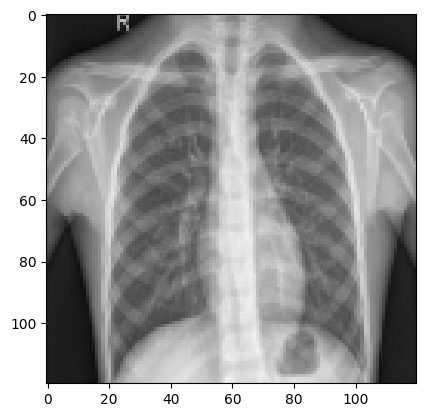

In [14]:
path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\NORMAL\IM-0001-0001.jpeg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (120,120), interpolation=cv2.INTER_AREA)
plt.imshow(img);

In [15]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 120, 120, 3)

In [16]:
type(img)

numpy.ndarray

In [40]:
img = tf.convert_to_tensor(img,dtype='uint8')
type(img)

tensorflow.python.framework.ops.EagerTensor

In [17]:
loaded_model = tf.keras.models.load_model("ResNet50.h5")

TypeError: weight_decay is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.

In [42]:
pred = loaded_model.predict(img)

NotImplementedError: in user code:

    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 475, in call
        raise NotImplementedError('Unimplemented `tf.keras.Model.call()`: if you '

    NotImplementedError: Exception encountered when calling layer "model_2" (type Model).
    
    Unimplemented `tf.keras.Model.call()`: if you intend to create a `Model` with the Functional API, please provide `inputs` and `outputs` arguments. Otherwise, subclass `Model` with an overridden `call()` method.
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 120, 120, 3), dtype=uint8)
      • training=False
      • mask=None


In [53]:
loaded_model.input

AttributeError: Layer model_4 is not connected, no input to return.

In [56]:
model = tf.keras.models.Model("resnet50.keras")

In [57]:
preds = model.predict(img)

NotImplementedError: in user code:

    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\ml\pneumonia_detection\venv\lib\site-packages\keras\engine\training.py", line 475, in call
        raise NotImplementedError('Unimplemented `tf.keras.Model.call()`: if you '

    NotImplementedError: Exception encountered when calling layer "model_6" (type Model).
    
    Unimplemented `tf.keras.Model.call()`: if you intend to create a `Model` with the Functional API, please provide `inputs` and `outputs` arguments. Otherwise, subclass `Model` with an overridden `call()` method.
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 120, 120, 3), dtype=uint8)
      • training=False
      • mask=None


In [58]:
model.input

AttributeError: Layer model_6 is not connected, no input to return.

In [59]:
tf.__version__

'2.8.2'

# https://datagen.tech/guides/computer-vision/resnet-50/

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import cv2

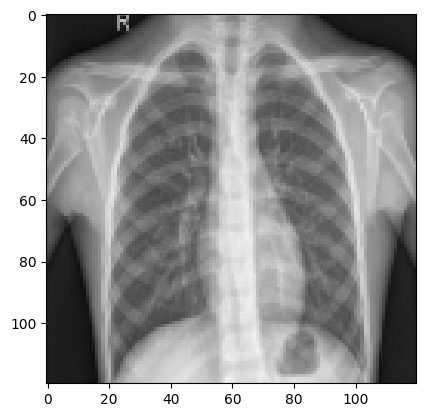

In [3]:
path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\NORMAL\IM-0001-0001.jpeg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (120,120), interpolation=cv2.INTER_AREA)
plt.imshow(img);

In [4]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 120, 120, 3)

In [11]:
model = tf.keras.models.load_model("vgg19.h5")

In [10]:
model

In [12]:
model.input

<KerasTensor: shape=(None, 120, 120, 3) dtype=float32 (created by layer 'input_1')>

In [18]:
pred = model.predict(img)

In [27]:
pred[0]

array([0.37710392, 0.6228961 ], dtype=float32)

In [32]:
print(f"normal :{pred[0][0]} \npneumonia :{pred[0][1]}")

normal :0.37710392475128174 
pneumonia :0.6228960752487183


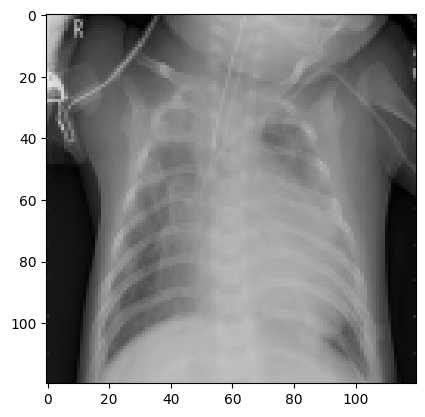

In [58]:
path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\PNEUMONIA\person1_virus_6.jpeg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (120,120), interpolation=cv2.INTER_AREA)
plt.imshow(img);

In [59]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 120, 120, 3)

In [41]:
resnet_model = tf.keras.models.load_model("local_train_resnet50.h5")

In [42]:
pred = resnet_model.predict(img)

In [43]:
pred

array([[0., 1.]], dtype=float32)

In [44]:
resnet_model.input

<KerasTensor: shape=(None, 120, 120, 3) dtype=float32 (created by layer 'input_1')>

In [45]:
resnet_model.output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense')>

In [57]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 126, 126, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 60, 60, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 60, 60, 64)   256         ['conv1_conv[0][0]']         

In [60]:
# pneumonia
resnet_model.predict(img)

array([[0., 1.]], dtype=float32)

# Evaluation

In [63]:
test_data_path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test"

testing_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1.0/225))

testing_iterator = testing_data_generator.flow_from_directory(test_data_path, class_mode="categorical", color_mode="rgb", target_size=(120,120), interpolation='nearest', batch_size=8)

Found 624 images belonging to 2 classes.


In [64]:
testing_iterator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [66]:
evaluation_result = resnet_model.evaluate(testing_iterator, batch_size=128)

78/78 [==============================] - 7s 91ms/step - loss: 9.4769 - accuracy: 0.6410


In [67]:
evaluation_result

[9.476888656616211, 0.6410256624221802]

In [72]:
np.argmax(pred, axis=1)

array([1], dtype=int64)

In [70]:
sigmoid_model = tf.keras.models.load_model("local_train_resnet50_sigmoid.h5")

In [71]:
pred = sigmoid_model.predict(img)
pred

array([[0., 1.]], dtype=float32)

# flower model

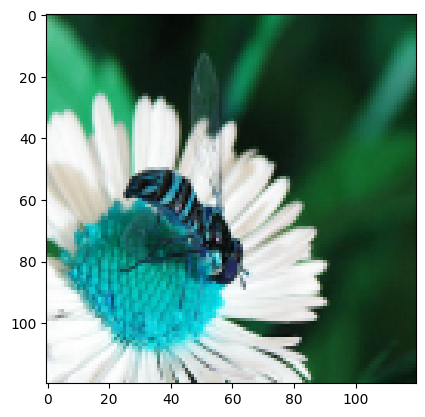

In [73]:
path = r"D:\ml\pneumonia_detection\flower_photos\daisy\5547758_eea9edfd54_n.jpg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (120,120), interpolation=cv2.INTER_AREA)
plt.imshow(img);

In [74]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 120, 120, 3)

In [75]:
flower_model = tf.keras.models.load_model("flower_photos_resnet50.h5")

In [76]:
pred = flower_model.predict(img)
pred

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [77]:
preds= np.argmax(pred, axis=1)
preds

array([3], dtype=int64)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [20]:
test_dir = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test"

testing_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1.0/225))

testing_iterator = testing_data_generator.flow_from_directory(test_dir,class_mode="categorical", color_mode="rgb", target_size=(244,244), interpolation='nearest', batch_size=16)

Found 624 images belonging to 2 classes.


In [21]:
testing_iterator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [5]:
model = tf.keras.models.load_model("ResNet50.h5")

In [6]:
model.input

<KerasTensor: shape=(None, 244, 244, 3) dtype=float32 (created by layer 'input_2')>

In [7]:
model.output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_1')>

In [22]:
model.evaluate(testing_iterator, batch_size=128)

39/39 [==============================] - 12s 262ms/step - loss: 2.4258 - accuracy: 0.6250


[2.4257988929748535, 0.625]

(244, 244, 3)

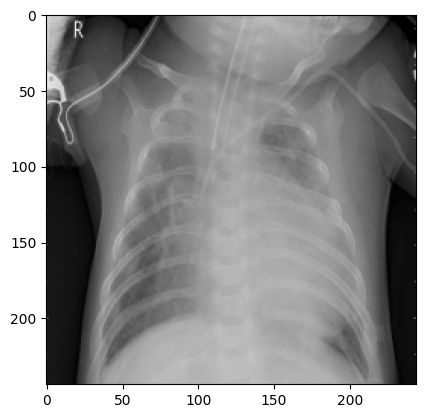

In [23]:
path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\PNEUMONIA\person1_virus_6.jpeg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (244,244), interpolation=cv2.INTER_AREA)
plt.imshow(img);
img.shape

In [24]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 244, 244, 3)

In [26]:
pred = model.predict(img)

In [28]:
testing_iterator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [27]:
preds= np.argmax(pred, axis=1)
preds

array([1], dtype=int64)

(1, 244, 244, 3)

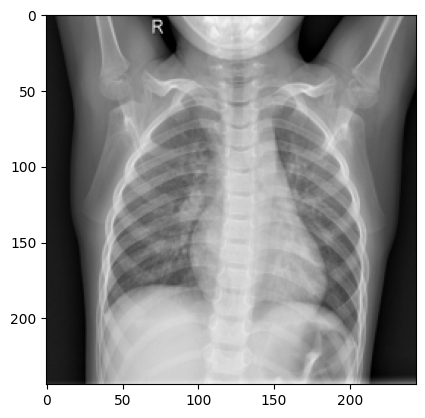

In [37]:
path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\train\NORMAL\IM-0115-0001.jpeg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (244,244), interpolation=cv2.INTER_AREA)
plt.imshow(img);
img = np.expand_dims(img, axis=0)
img.shape

In [44]:
pred = model.predict(img)
preds= np.argmax(pred, axis=-1)
preds

array([1], dtype=int64)

In [39]:
pred

array([[0., 1.]], dtype=float32)

In [70]:
model = tf.keras.models.load_model("VGG19.h5")

In [74]:
model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

(1, 224, 224, 3)

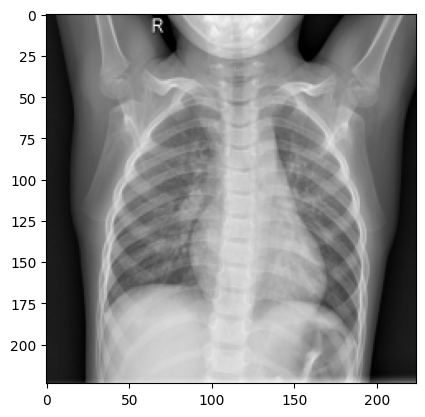

In [72]:
path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\train\NORMAL\IM-0115-0001.jpeg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
plt.imshow(img);
img = np.expand_dims(img, axis=0)
img.shape

In [75]:
pred = model.predict(img)

In [76]:
pred

array([[nan, nan]], dtype=float32)

In [55]:
data_dir = r"D:\ml\pneumonia_detection\flower_photos" #r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\train"

training_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1.0/225))

training_iterator = training_data_generator.flow_from_directory(data_dir,class_mode="categorical", color_mode="rgb", target_size=(224,224), interpolation='nearest', batch_size=16)


Found 3670 images belonging to 5 classes.


In [77]:
1341 - 3875

-2534

<BarContainer object of 2 artists>

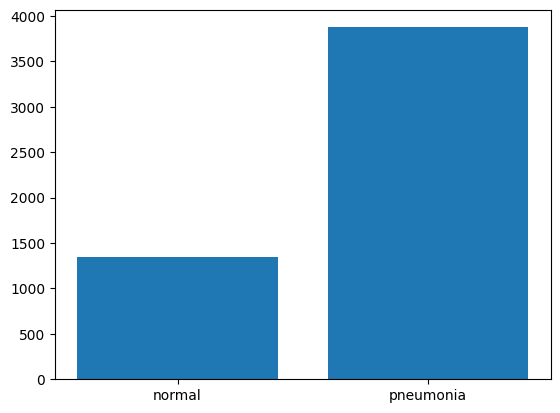

In [88]:
data = [1341, 3875]
label = ['normal', 'pneumonia']

plt.bar(label, data)

In [89]:
1341 / 3875 *100

34.60645161290323

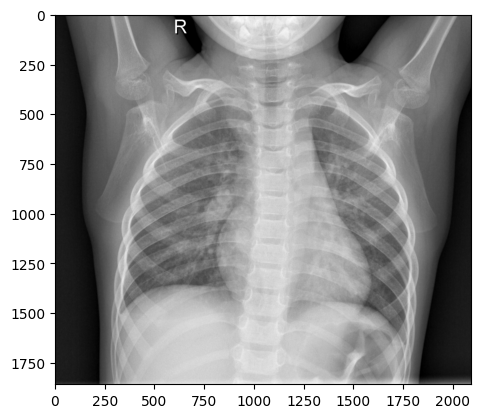

In [2]:
path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\train\NORMAL\IM-0115-0001.jpeg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
plt.imshow(img);

In [4]:
flipped = tf.image.flip_left_right(img)

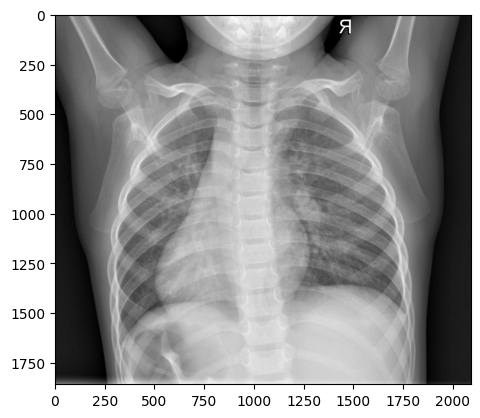

In [5]:
plt.imshow(flipped);

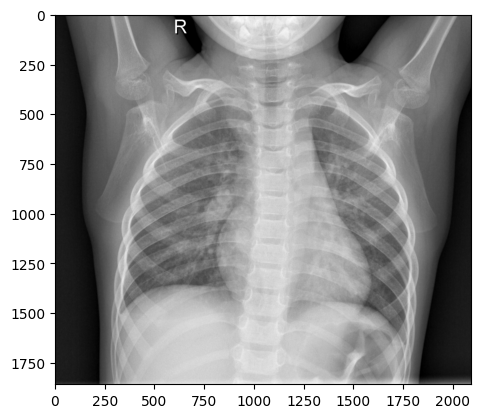

In [6]:
saturation = tf.image.adjust_saturation(img, 3)
plt.imshow(saturation);

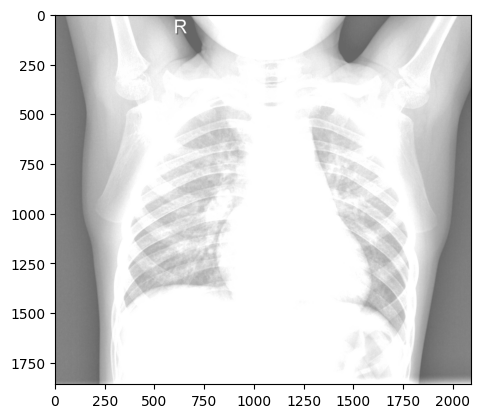

In [5]:
brightness = tf.image.adjust_brightness(img, 0.4)
plt.imshow(brightness);

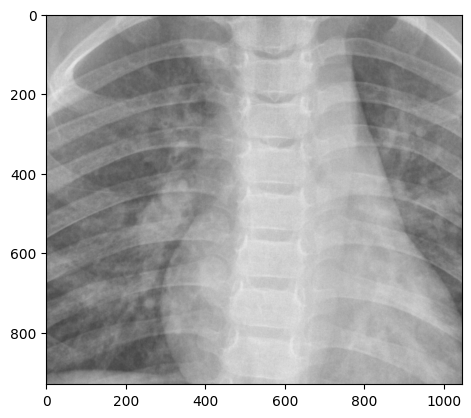

In [7]:
crop = tf.image.central_crop(img, central_fraction=0.5)
plt.imshow(crop);

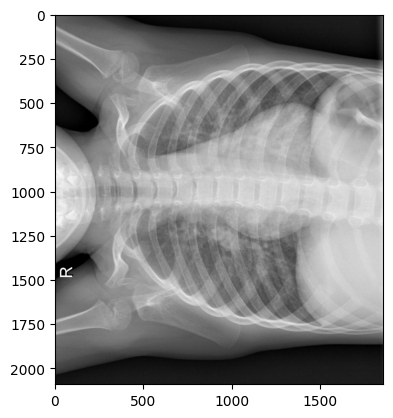

In [8]:
rotate = tf.image.rot90(img)
plt.imshow(rotate);

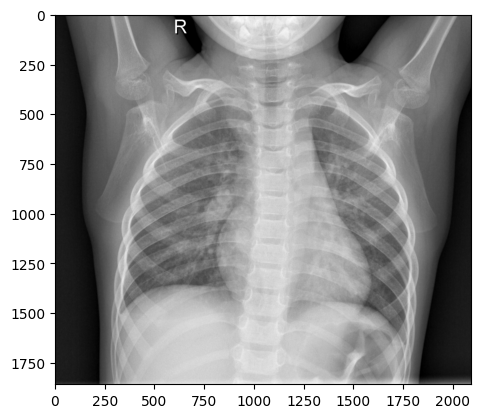

In [10]:
upward = tf.image.random_flip_up_down(img)
plt.imshow(upward);

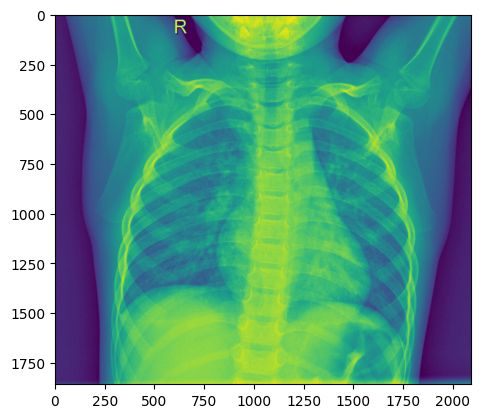

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray);

In [12]:
1341*3

4023

# data augmentation balance the dataset

In [14]:
path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\train\NORMAL"

In [17]:
import os

os.listdir(path)

['IM-0115-0001.jpeg',
 'IM-0117-0001.jpeg',
 'IM-0119-0001.jpeg',
 'IM-0122-0001.jpeg',
 'IM-0125-0001.jpeg',
 'IM-0127-0001.jpeg',
 'IM-0128-0001.jpeg',
 'IM-0129-0001.jpeg',
 'IM-0131-0001.jpeg',
 'IM-0133-0001.jpeg',
 'IM-0135-0001.jpeg',
 'IM-0137-0001.jpeg',
 'IM-0140-0001.jpeg',
 'IM-0141-0001.jpeg',
 'IM-0143-0001.jpeg',
 'IM-0145-0001.jpeg',
 'IM-0147-0001.jpeg',
 'IM-0149-0001.jpeg',
 'IM-0151-0001.jpeg',
 'IM-0152-0001.jpeg',
 'IM-0154-0001.jpeg',
 'IM-0156-0001.jpeg',
 'IM-0158-0001.jpeg',
 'IM-0160-0001.jpeg',
 'IM-0162-0001.jpeg',
 'IM-0164-0001.jpeg',
 'IM-0166-0001.jpeg',
 'IM-0168-0001.jpeg',
 'IM-0170-0001.jpeg',
 'IM-0172-0001.jpeg',
 'IM-0176-0001.jpeg',
 'IM-0177-0001.jpeg',
 'IM-0178-0001.jpeg',
 'IM-0180-0001.jpeg',
 'IM-0182-0001.jpeg',
 'IM-0183-0001.jpeg',
 'IM-0185-0001.jpeg',
 'IM-0187-0001.jpeg',
 'IM-0189-0001.jpeg',
 'IM-0191-0001.jpeg',
 'IM-0193-0001.jpeg',
 'IM-0195-0001.jpeg',
 'IM-0199-0001.jpeg',
 'IM-0201-0001.jpeg',
 'IM-0203-0001.jpeg',
 'IM-0205-

In [21]:
images_path = [] 
for i in os.listdir(path):
    #print(os.path.join(path,i))
    images_path.append(os.path.join(path,i))


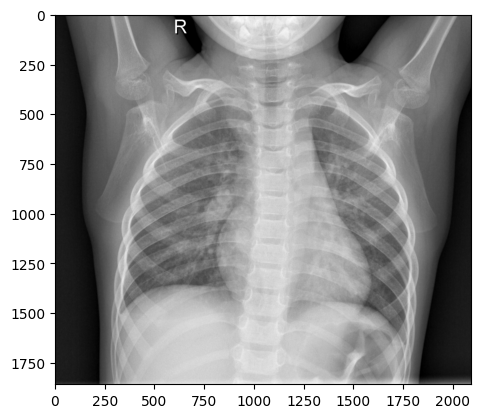

In [26]:
img = cv2.imread(images_path[0])
plt.imshow(img);

In [27]:
cv2.imwrite(f"test.jpg",img)

True

In [32]:
test = cv2.imread("test.jpg")

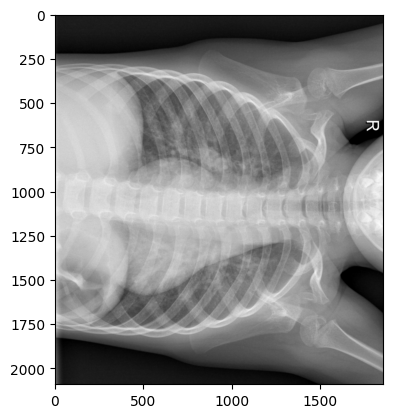

In [38]:
plt.imshow(cv2.rotate(test,cv2.ROTATE_90_CLOCKWISE));

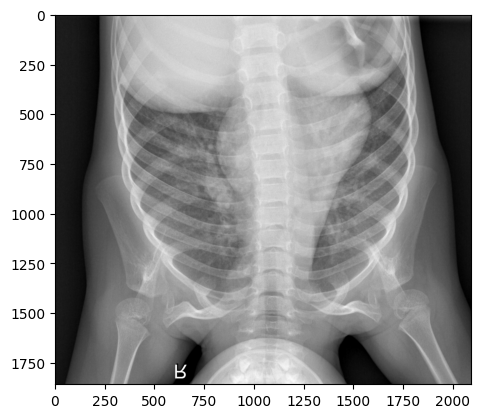

In [37]:
plt.imshow(cv2.flip(test,0));

In [39]:
for i in images_path:
    #read image
    img = cv2.imread(i)
    #gray
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    cv2.imwrite(f"{i}gray.jpg", gray)
    #rotate
    rotate = cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite(f"{i}rotate.jpg", rotate)
    #flipped
    flipped = cv2.flip(img,0)
    cv2.imwrite(f"{i}flipped.jpg", flipped)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

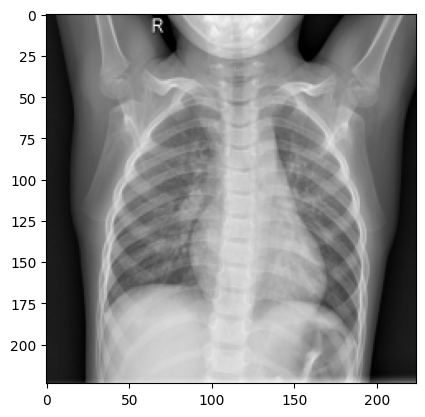

In [7]:
path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\train\NORMAL\IM-0115-0001.jpeg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
plt.imshow(img);

In [8]:
img = np.expand_dims(img, axis=0)
img.shape 

(1, 224, 224, 3)

In [3]:
model = tf.keras.models.load_model("new_resnet50.h5")

In [4]:
model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [9]:
model.output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense')>

In [10]:
pred = model.predict(img)

In [11]:
pred

array([[1., 0.]], dtype=float32)

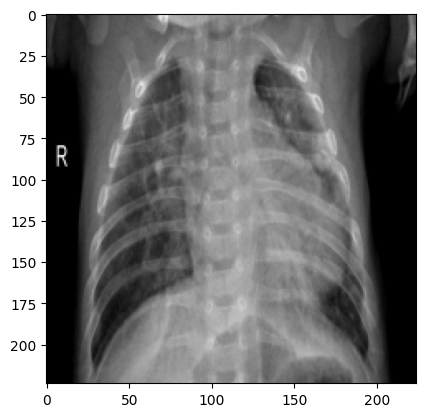

In [12]:
path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\PNEUMONIA\person1_virus_13.jpeg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
plt.imshow(img);

In [13]:
img = np.expand_dims(img, axis=0)
img.shape 

(1, 224, 224, 3)

In [14]:
pred = model.predict(img)
pred

array([[1., 0.]], dtype=float32)

# without weights with sigmoid activation funcation

In [18]:
data_dir = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\train"

training_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1.0/225))

training_iterator = training_data_generator.flow_from_directory(data_dir,class_mode="categorical", color_mode="rgb", target_size=(224,224), interpolation='nearest', batch_size=16)


Found 8924 images belonging to 2 classes.


In [20]:
model =  tf.keras.applications.resnet50.ResNet50(
    input_shape=training_iterator.image_shape,
    weights=None,
    include_top = False)

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
            loss="binary_crossentropy",
            metrics=["accuracy"])

In [22]:
flatten_in = tf.keras.layers.Flatten()(model.output)

prediction = tf.keras.layers.Dense(
    units=1,
    activation="sigmoid"
)(flatten_in)

full_model = tf.keras.models.Model(
    inputs=model.input,
    outputs=prediction
)

In [23]:
full_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [24]:
full_model.fit(training_iterator,batch_size=128,epochs=1)

558/558 [==============================] - 3120s 6s/step - loss: 4.8607 - accuracy: 0.5000


In [26]:
pred = full_model.predict(img)

In [27]:
pred

array([[1.]], dtype=float32)

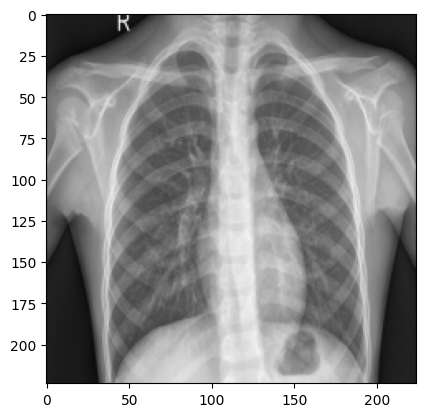

In [28]:
path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\NORMAL\IM-0001-0001.jpeg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
plt.imshow(img);

In [29]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 224, 224, 3)

In [32]:
pred = full_model.predict(img)

In [33]:
pred

array([[1.]], dtype=float32)

In [34]:
full_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [35]:
full_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>

In [36]:
full_model.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense')>

In [37]:
model = tf.keras.models.load_model("new_resnet50.h5")

In [38]:
pred = model.predict(img)

# CNN

In [42]:
data_dir = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\train"

training_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1.0/225))

training_iterator = training_data_generator.flow_from_directory(data_dir,class_mode="categorical", color_mode="rgb", target_size=(224,224), interpolation='nearest', batch_size=16)


Found 8924 images belonging to 2 classes.


In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(224,224,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])


In [45]:
model.fit(training_iterator, epochs=10)

Epoch 1/10
 81/558 [===>..........................] - ETA: 8:51 - loss: 0.6967 - acc: 0.5000

KeyboardInterrupt: 

In [46]:
img.shape

(1, 224, 224, 3)

In [47]:
model = tf.keras.models.load_model("CNN.h5")

In [48]:
model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'conv2d_input')>

In [49]:
model.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>

In [50]:
pred = model.predict(img)

In [51]:
pred

array([[0.60152274]], dtype=float32)

In [57]:
test_dir = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test"

testing_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1.0/225))

testing_iterator = testing_data_generator.flow_from_directory(data_dir,class_mode="categorical", color_mode="rgb", target_size=(224,224), interpolation='nearest', batch_size=16)


Found 8924 images belonging to 2 classes.


In [58]:
model.evaluate(testing_iterator)

558/558 [==============================] - 213s 379ms/step - loss: 0.6931 - acc: 0.5000


[0.6931459307670593, 0.5]

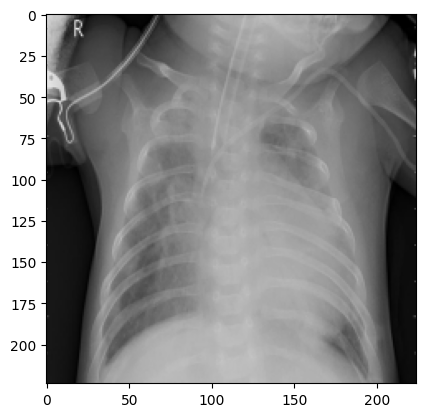

In [14]:
path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\PNEUMONIA\person1_virus_6.jpeg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
plt.imshow(img);

In [60]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 224, 224, 3)

In [63]:
pred = model.predict(img)

In [64]:
pred

array([[0.5944101]], dtype=float32)

In [65]:
new = tf.keras.models.load_model("new_resnet50.h5")

In [66]:
pred = new.predict(img)

In [67]:
pred

array([[0., 1.]], dtype=float32)

# custom train yolov8 -- https://docs.ultralytics.com/modes/train/

# data.yaml -- https://github.com/deepakat002/yolov8/blob/main/dataset.yaml

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [8]:
data_dir = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\train"

training_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1.0/225))

training_iterator = training_data_generator.flow_from_directory(data_dir,class_mode="categorical", color_mode="rgba", target_size=(224,224), interpolation='nearest', batch_size=16)


Found 8924 images belonging to 2 classes.


In [11]:
training_iterator[0][0][0].shape

(224, 224, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


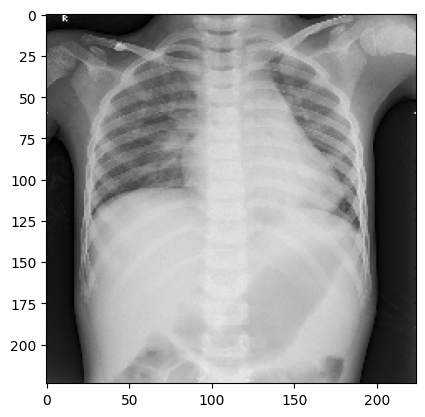

In [9]:
plt.imshow(training_iterator[0][0][0]);

In [25]:
model = tf.keras.models.load_model("CNN.h5")

(1, 224, 224, 3)

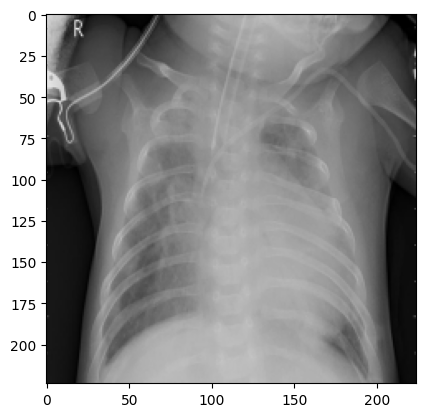

In [22]:
path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\PNEUMONIA\person1_virus_6.jpeg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
plt.imshow(img);
img = np.expand_dims(img, axis=0)
img.shape

In [26]:
pred = model.predict(img)

In [27]:
pred

array([[0.5944101]], dtype=float32)

# YOLOV8 -- https://huggingface.co/keremberke/yolov8m-chest-xray-classification

In [2]:
from ultralyticsplus import YOLO, postprocess_classify_output

# load model
model = YOLO('keremberke/yolov8m-chest-xray-classification')

# set model parameters
model.overrides['conf'] = 0.25  # model confidence threshold

# set image
image = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\NORMAL\IM-0001-0001.jpeg"

# perform inference
results = model.predict(image)

# observe results
print(results[0].probs) # [0.1, 0.2, 0.3, 0.4]
processed_result = postprocess_classify_output(model, result=results[0])
print(processed_result) 

d:\ml\pneumonia_detection\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Ultralytics YOLOv8.0.23  Python-3.9.18 torch-2.2.2+cpu CPU
YOLOv8m-cls summary (fused): 103 layers, 15765218 parameters, 0 gradients, 41.6 GFLOPs
image 1/1 D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\NORMAL\IM-0001-0001.jpeg: 224x224 NORMAL 0.71, PNEUMONIA 0.29, 187.8ms
Speed: 0.0ms pre-process, 187.8ms inference, 3.7ms postprocess per image at shape (1, 3, 224, 224)


tensor([0.71477, 0.28523])
{'NORMAL': 0.7147679924964905, 'PNEUMONIA': 0.2852320075035095}


In [3]:
image = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\PNEUMONIA\person3_virus_16.jpeg"

# perform inference
results = model.predict(image)

# observe results
print(results[0].probs) # [0.1, 0.2, 0.3, 0.4]
processed_result = postprocess_classify_output(model, result=results[0])
print(processed_result) 

image 1/1 D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\PNEUMONIA\person3_virus_16.jpeg: 224x224 PNEUMONIA 0.73, NORMAL 0.27, 143.6ms
Speed: 0.0ms pre-process, 143.6ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


tensor([0.26894, 0.73106])
{'NORMAL': 0.26894277334213257, 'PNEUMONIA': 0.7310572266578674}


In [4]:
image = r"D:\ml\pneumonia_detection\images.jpeg"

# perform inference
results = model.predict(image)

# observe results
print(results[0].probs) # [0.1, 0.2, 0.3, 0.4]
processed_result = postprocess_classify_output(model, result=results[0])
print(processed_result) 

image 1/1 D:\ml\pneumonia_detection\images.jpeg: 224x224 PNEUMONIA 0.73, NORMAL 0.27, 124.7ms
Speed: 0.0ms pre-process, 124.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


tensor([0.26898, 0.73102])
{'NORMAL': 0.26898127794265747, 'PNEUMONIA': 0.7310187220573425}


In [5]:
import cv2

In [12]:
img = cv2.imread(r"D:\ml\pneumonia_detection\flower_photos\daisy\5547758_eea9edfd54_n.jpg")

In [13]:
img.shape

(232, 320, 3)

In [14]:
img1 = cv2.imread(r"D:\ml\pneumonia_detection\flower_photos\daisy\5794839_200acd910c_n.jpg")
img1.shape

(240, 320, 3)

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [32]:
flower = tf.keras.models.load_model("flower_CNN.h5")

In [33]:
flower.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'conv2d_input')>

(1, 224, 224, 3)

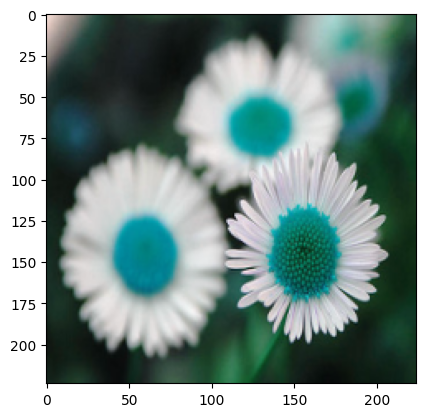

In [34]:
path = r"D:\ml\pneumonia_detection\flower_photos\daisy\5794839_200acd910c_n.jpg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
plt.imshow(img);
img = np.expand_dims(img, axis=0)
img.shape

In [35]:
pred = flower.predict(img)

In [36]:
pred

array([[          1,           0,           0,           0,           0]], dtype=float32)

(1, 224, 224, 3)

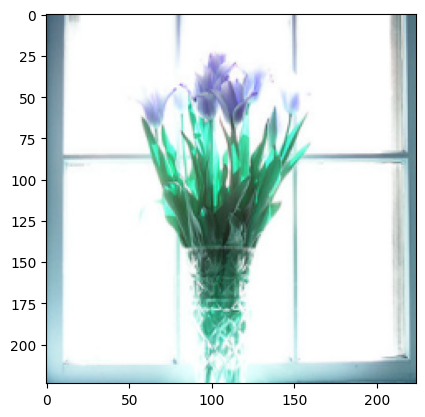

In [37]:
path = r"D:\ml\pneumonia_detection\flower_photos\tulips\113902743_8f537f769b_n.jpg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
plt.imshow(img);
img = np.expand_dims(img, axis=0)
img.shape

In [38]:
pred = flower.predict(img)

In [40]:
pred

array([[          1,           0,           0,           0,           0]], dtype=float32)

(1, 224, 224, 3)

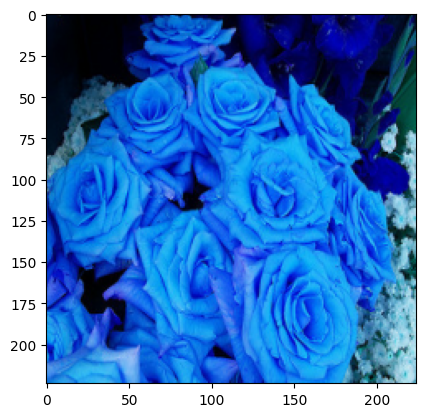

In [41]:
path = r"D:\ml\pneumonia_detection\flower_photos\roses\123128873_546b8b7355_n.jpg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
plt.imshow(img);
img = np.expand_dims(img, axis=0)
img.shape

In [42]:
pred = flower.predict(img)
pred

array([[          1,           0,           0,           0,           0]], dtype=float32)

In [43]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [46]:
#one-hot encode target column
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_train[0]


array([          0,           0,           0,           0,           0,           1,           0,           0,           0,           0], dtype=float32)

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [49]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 123s 65ms/step - loss: 0.2186 - accuracy: 0.9537 - val_loss: 0.0772 - val_accuracy: 0.9760
Epoch 2/3
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0653 - accuracy: 0.9806 - val_loss: 0.0751 - val_accuracy: 0.9796
Epoch 3/3
1875/1875 [==============================] - 93s 49ms/step - loss: 0.0487 - accuracy: 0.9845 - val_loss: 0.0936 - val_accuracy: 0.9745


In [59]:
X_test[0].shape

(28, 28)

In [64]:
#predict first 4 images in the test set
pred = model.predict(np.expand_dims(X_test[4], axis=0))

In [65]:
res = np.argmax(pred)

In [66]:
res

4

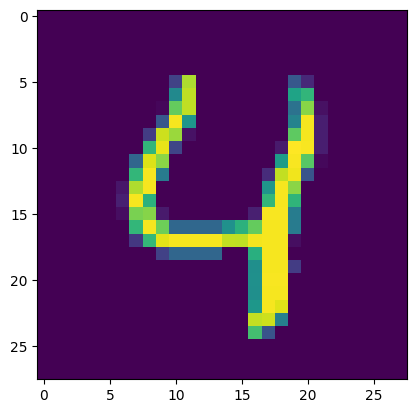

In [68]:
plt.imshow(X_test[4]);

In [70]:
mist = tf.keras.models.load_model("mist.h5")

In [72]:
pred = mist.predict(np.expand_dims(X_test[4], axis=0))
pred

array([[ 2.0458e-09,   6.037e-10,  2.8241e-09,  1.3146e-09,           1,  4.1746e-09,  2.8927e-10,  5.5548e-07,  2.4495e-10,   2.007e-06]], dtype=float32)

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [3]:
model = tf.keras.models.load_model("new_CNN.h5", compile=False)

In [4]:
model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'conv2d_25_input')>

In [5]:
model.output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_11')>

(1, 224, 224, 3)

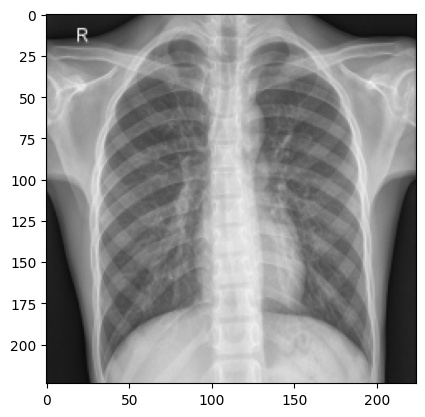

In [6]:
path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\NORMAL\IM-0005-0001.jpeg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
plt.imshow(img);
img = np.expand_dims(img, axis=0)
img.shape

In [7]:
pred = model.predict(img)
pred

array([[0., 1.]], dtype=float32)

(1, 224, 224, 3)

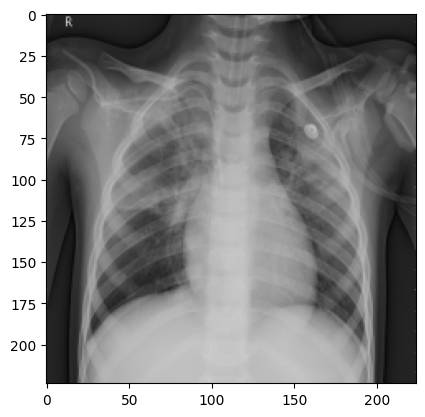

In [8]:
path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\PNEUMONIA\person3_virus_17.jpeg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
plt.imshow(img);
img = np.expand_dims(img, axis=0)
img.shape

In [12]:
pred = model.predict(img)
pred

array([[1., 0.]], dtype=float32)

In [13]:
!python --version

Python 3.9.18


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [8]:
from ultralyticsplus import YOLO, postprocess_classify_output
import ultralytics
ultralytics.checks()
import torch

Ultralytics YOLOv8.0.23  Python-3.9.18 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
Setup complete  (8 CPUs, 7.8 GB RAM, 60.7/62.2 GB disk)


In [3]:
print(torch.cuda.is_available())

True


In [19]:
!pip show torch

Name: torch
Version: 2.1.2
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: c:\users\nites\miniconda3\lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: torchvision


In [65]:
model = YOLO('keremberke/yolov8m-chest-xray-classification')

# set model parameters
model.overrides['conf'] = 0.25  # model confidence threshold

# set image
image = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\PNEUMONIA\person3_virus_17.jpeg"

# perform inference
results = model.predict(image)

# observe results
processed_result = postprocess_classify_output(model, result=results[0])
print(processed_result)

Ultralytics YOLOv8.0.23  Python-3.9.18 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
YOLOv8m-cls summary (fused): 103 layers, 15765218 parameters, 0 gradients, 41.6 GFLOPs
image 1/1 D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\PNEUMONIA\person3_virus_17.jpeg: 224x224 PNEUMONIA 0.73, NORMAL 0.27, 19.9ms
Speed: 1.0ms pre-process, 19.9ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


{'NORMAL': 0.26961302757263184, 'PNEUMONIA': 0.7303869724273682}


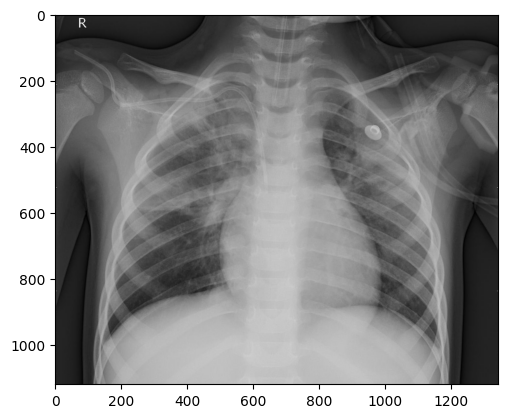

In [21]:
path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\PNEUMONIA\person3_virus_17.jpeg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
plt.imshow(img);


In [22]:
res = model(img)


0: 224x224 PNEUMONIA 0.73, NORMAL 0.27, 66.8ms
Speed: 1.0ms pre-process, 66.8ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


In [63]:
type(res[0])

ultralytics.yolo.engine.results.Results

In [24]:
processed_result = postprocess_classify_output(model, result=results[0])
processed_result

{'NORMAL': 0.26961302757263184, 'PNEUMONIA': 0.7303869724273682}

In [44]:
print(f"{processed_result['NORMAL']:.2%}")

26.96%


In [67]:
print(f"{processed_result['PNEUMONIA']:.2%}")

73.04%


In [68]:
model = tf.keras.models.load_model("CNN.h5")

(1, 224, 224, 3)

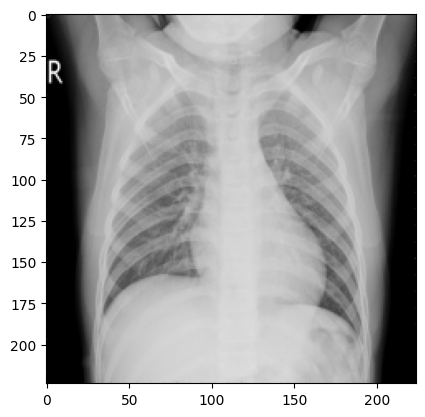

In [81]:
img = cv2.imread(r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\val\NORMAL\NORMAL2-IM-1427-0001.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
plt.imshow(img);
img = np.expand_dims(img, axis=0)
img.shape

In [74]:
model.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>

In [82]:
res = model.predict(img)
res

array([[    0.61361]], dtype=float32)

In [89]:
print(f"{res[0][0]:.2%}")

61.36%


In [105]:
100 - float(f"{res[0][0]:.2%}".split("%")[0])

38.64

In [109]:
f"{1 - res[0][0]:.2%}"

'38.64%'

(1, 224, 224, 3)

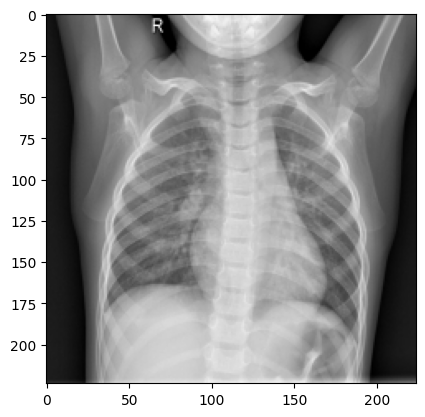

In [9]:
path = r"D:\ml\pneumonia_detection\test.jpg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
plt.imshow(img);
img = np.expand_dims(img, axis=0)
img.shape

In [4]:
cnn = tf.keras.models.load_model("new_CNN.h5")

In [10]:
pred = cnn.predict(img)
pred

array([[1.0000000e+00, 1.2539381e-35]], dtype=float32)

In [15]:
preds = np.argmax(pred)

In [16]:
preds

0

In [17]:
test_dir = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test"

testing_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1.0/225))

testing_iterator = testing_data_generator.flow_from_directory(test_dir,class_mode="categorical", color_mode="rgb", target_size=(244,244), interpolation='nearest', batch_size=16)

Found 624 images belonging to 2 classes.


In [18]:
cnn.evaluate(testing_iterator)

39/39 [==============================] - 20s 514ms/step - loss: 1.1250 - acc: 0.7452


[1.124971866607666, 0.745192289352417]

In [19]:
used_model = tf.keras.models.load_model("CNN.h5")

In [20]:
used_model.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>

In [21]:
used_model.evaluate(testing_iterator)

39/39 [==============================] - 16s 399ms/step - loss: 0.6931 - acc: 0.5000


[0.6931475400924683, 0.5]

(1, 224, 224, 3)

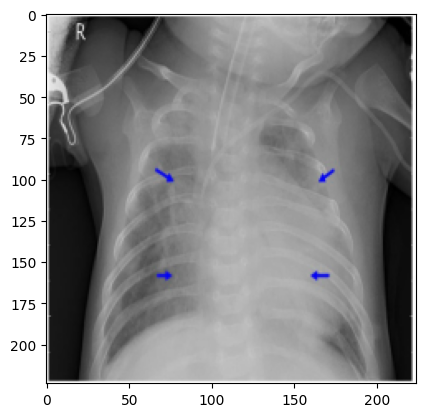

In [27]:
path = r"D:\ml\pneumonia_detection\pneumonia.jpg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
plt.imshow(img);
img = np.expand_dims(img, axis=0)
img.shape

In [23]:
testing_iterator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [31]:
pred = cnn.predict(img)
pred

array([[0., 1.]], dtype=float32)

In [37]:
np.save('img.npz',arr=img)

In [38]:
l = np.load("img.npz.npy")

In [42]:
l[0].shape

(224, 224, 3)

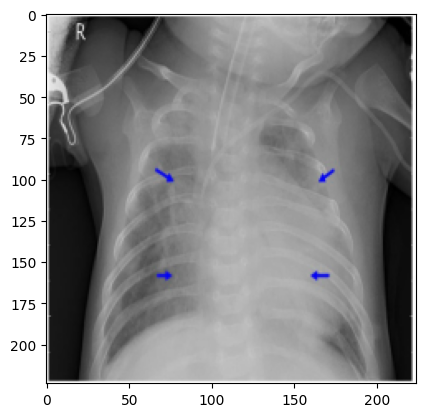

In [43]:
plt.imshow(l[0]);

In [55]:
import mysql.connector as conn

In [160]:
mydb = conn.Connect(host="localhost",user="root",passwd="nitesh8527")

In [161]:
cursor= mydb.cursor()

In [162]:
cursor.execute("show databases")
cursor.fetchall()

[('amazon',),
 ('cardataset',),
 ('census',),
 ('census_data',),
 ('information_schema',),
 ('leetcode_practice',),
 ('mysql',),
 ('oder',),
 ('performance_schema',),
 ('pneumonia_data',),
 ('pratice',),
 ('ride_share',),
 ('student',),
 ('sys',),
 ('test',)]

In [34]:
cursor.execute("create database pneumonia_data")

DatabaseError: 1007 (HY000): Can't create database 'pneumonia_data'; database exists

In [ ]:
mydb.commit()

In [ ]:
cursor.execute("show databases")
cursor.fetchall()

[('amazon',),
 ('cardataset',),
 ('census',),
 ('census_data',),
 ('information_schema',),
 ('leetcode_practice',),
 ('mysql',),
 ('oder',),
 ('performance_schema',),
 ('pneumonia_data',),
 ('pratice',),
 ('ride_share',),
 ('student',),
 ('sys',),
 ('test',)]

In [163]:
cursor.execute("use pneumonia_data")

In [ ]:
cursor.execute("create table user_data(patient_name varchar(20), age int(10), x_ray varchar(50), prediction varchar(50))")

In [ ]:
mydb.commit()

In [60]:
cursor.execute("describe user_data")

In [61]:
cursor.fetchall()

[('patient_name', 'varchar(20)', 'YES', '', None, ''),
 ('age', 'int', 'YES', '', None, ''),
 ('x_ray', 'blob', 'NO', '', None, ''),
 ('prediction', 'varchar(50)', 'YES', '', None, '')]

In [ ]:
import numpy as np
img = np.load("img.npz.npy")
img.shape

(1, 224, 224, 3)

In [ ]:
str(img)

'[[[[254 254 254]\n   [254 254 254]\n   [255 255 255]\n   ...\n   [252 252 252]\n   [253 253 253]\n   [254 254 254]]\n\n  [[253 253 253]\n   [254 254 254]\n   [254 254 254]\n   ...\n   [252 252 252]\n   [254 254 254]\n   [254 254 254]]\n\n  [[255 255 255]\n   [240 240 240]\n   [221 221 221]\n   ...\n   [117 117 117]\n   [254 254 254]\n   [255 255 255]]\n\n  ...\n\n  [[255 255 255]\n   [154 154 154]\n   [ 25  25  25]\n   ...\n   [102 102 102]\n   [254 254 254]\n   [254 254 254]]\n\n  [[254 254 254]\n   [181 181 181]\n   [ 83  83  83]\n   ...\n   [143 143 143]\n   [252 252 252]\n   [255 255 255]]\n\n  [[254 254 254]\n   [251 251 251]\n   [254 254 254]\n   ...\n   [253 253 253]\n   [254 254 254]\n   [255 255 255]]]]'

In [ ]:
query = f"insert into user_data values('aa', 30, {str(img)},'bsfbbsf')"

In [ ]:
query

"insert into user_data values('aa', 30, [[[[254 254 254]\n   [254 254 254]\n   [255 255 255]\n   ...\n   [252 252 252]\n   [253 253 253]\n   [254 254 254]]\n\n  [[253 253 253]\n   [254 254 254]\n   [254 254 254]\n   ...\n   [252 252 252]\n   [254 254 254]\n   [254 254 254]]\n\n  [[255 255 255]\n   [240 240 240]\n   [221 221 221]\n   ...\n   [117 117 117]\n   [254 254 254]\n   [255 255 255]]\n\n  ...\n\n  [[255 255 255]\n   [154 154 154]\n   [ 25  25  25]\n   ...\n   [102 102 102]\n   [254 254 254]\n   [254 254 254]]\n\n  [[254 254 254]\n   [181 181 181]\n   [ 83  83  83]\n   ...\n   [143 143 143]\n   [252 252 252]\n   [255 255 255]]\n\n  [[254 254 254]\n   [251 251 251]\n   [254 254 254]\n   ...\n   [253 253 253]\n   [254 254 254]\n   [255 255 255]]]],'bsfbbsf')"

In [35]:
cursor.execute(query)

ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '[[[[254 254 254]
   [254 254 254]
   [255 255 255]
   ...
   [252 252 252]
   [2' at line 1

In [36]:
# remove_table
cursor.execute("drop table user_data")
mydb.commit()

In [37]:
cursor.execute("show tables")
cursor.fetchall()

[]

In [38]:
cursor.execute("create table user_data(patient_name varchar(20), age int(10), x_ray BLOB NOT NULL, prediction varchar(50))Engine = InnoDB")

In [39]:
mydb.commit()

In [40]:
cursor.execute("describe user_data")
cursor.fetchall()

[('patient_name', 'varchar(20)', 'YES', '', None, ''),
 ('age', 'int', 'YES', '', None, ''),
 ('x_ray', 'blob', 'NO', '', None, ''),
 ('prediction', 'varchar(50)', 'YES', '', None, '')]

In [62]:
cursor.execute("insert into user_data values('a', 30, 'D:\ml\pneumonia_detection\test.jpg','gdngg')")

In [63]:
mydb.commit()

In [73]:
cursor.execute("select * from user_data")
data = cursor.fetchall()

In [66]:
#working in workbench
cursor.execute("select patient_name, age, convert(x_ray using utf8), prediction from user_data;")
cursor.fetchall()

InternalError: Unread result found

In [81]:
image = data[0][2]

In [87]:
image

b'D:mlpneumonia_detection\test.jpg'

In [80]:
import base64

In [89]:
binary_data = base64.b64decode(image + b'==')

In [104]:
binary_data

b'\x0eii\x9d\xeb\xa6\xa2x\x9au\xeb^r\xd8\xa8\x9d\xeb-\x8e\x98'

In [96]:
from PIL import Image
import io

In [102]:
image = Image.open(io.BytesIO(binary_data))

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001AC7FD04860>

In [105]:
cursor.execute("drop table user_data")
mydb.commit()

In [106]:
cursor.execute("create table user_data(patient_name varchar(20), age int(10), x_ray LONGBLOB NOT NULL, prediction varchar(50))")

In [107]:
mydb.commit()

# We must encode the file to get base64 string

In [110]:
file = open(r'D:\ml\pneumonia_detection\test.jpg','rb').read()

In [113]:
# We must encode the file to get base64 string

file = base64.b64encode(file)

In [114]:
args = ('a',30,file,'normal')

query = "insert into user_data values(%s, %s, %s, %s)"

In [115]:
cursor.execute(query,args)

In [116]:
mydb.commit()

In [119]:
cursor.execute("select * from user_data")
data = cursor.fetchall()

In [129]:
image = data[0][2]

In [130]:
binary_data = base64.b64decode(image)

In [131]:
image = Image.open(io.BytesIO(binary_data))

In [139]:
array = np.array(image)

In [141]:
array.shape

(1858, 2090, 3)

In [142]:
import matplotlib.pyplot as plt

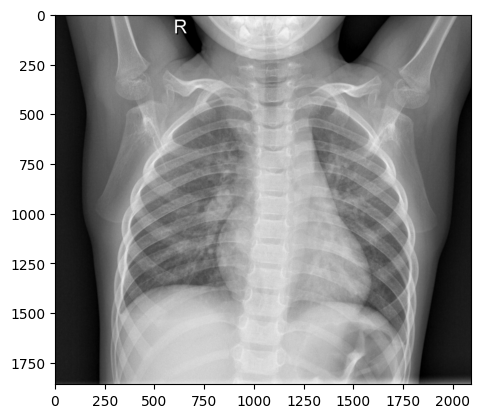

In [143]:
plt.imshow(array);

In [144]:
cursor.execute("alter table user_data drop column prediction")
mydb.commit()

In [145]:
cursor.execute("describe user_data")
cursor.fetchall()

[('patient_name', 'varchar(20)', 'YES', '', None, ''),
 ('age', 'int', 'YES', '', None, ''),
 ('x_ray', 'longblob', 'NO', '', None, '')]

In [148]:
cursor.execute("alter table user_data add column normal_prediction varchar(20)")
mydb.commit()

In [149]:
cursor.execute("alter table user_data add column pneumonia_prediction varchar(20)")
mydb.commit()

In [154]:
cursor.execute("describe user_data")

In [155]:
cursor.fetchall()

[('patient_name', 'varchar(20)', 'YES', '', None, ''),
 ('age', 'int', 'YES', '', None, ''),
 ('x_ray', 'longblob', 'NO', '', None, ''),
 ('normal_prediction', 'varchar(20)', 'YES', '', None, ''),
 ('pneumonia_prediction', 'varchar(20)', 'YES', '', None, '')]

In [164]:
cursor.execute("select * from user_data")
data = cursor.fetchall()

In [185]:
binary_data = data[4][2]

In [186]:
img = Image.open(io.BytesIO(binary_data))

In [187]:
img.show()

In [188]:
img.mode

'L'

In [189]:
img = np.array(img)

In [190]:
img.shape

(1110, 1276)

In [191]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [193]:
img.shape

(1110, 1276, 3)

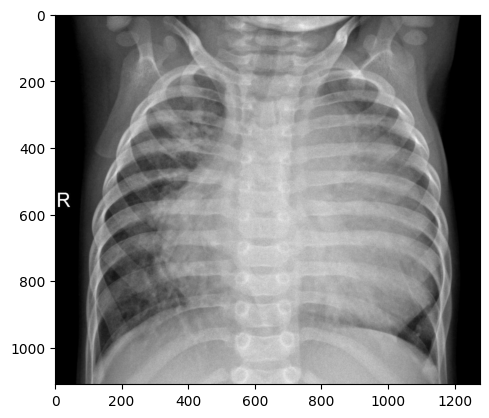

In [192]:
plt.imshow(img);

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.15.0'

(1, 244, 244, 3)

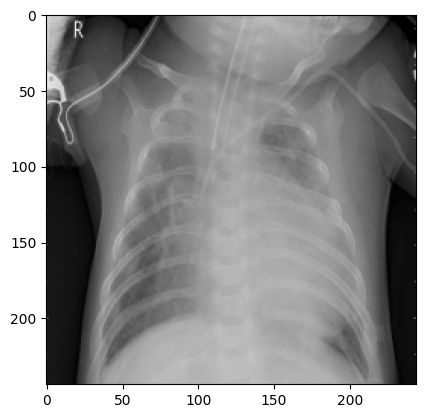

In [3]:
path = r"D:\ml\pneumonia_detection\chest_x_ray_dataset\chest_xray\test\PNEUMONIA\person1_virus_6.jpeg"
img = plt.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (244,244), interpolation=cv2.INTER_AREA)
plt.imshow(img);
img = np.expand_dims(img, axis=0)
img.shape

In [4]:
model = tf.keras.models.load_model("CNN.h5")

In [5]:
model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'conv2d_input')>

In [6]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

RuntimeError: Visible devices cannot be modified after being initialized

In [3]:
kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

SyntaxError: invalid syntax (2891683672.py, line 1)

In [1]:
from kaggle.api.kaggle_api_extended import  KaggleApi


In [2]:
api = KaggleApi()

In [3]:
api.authenticate()

In [7]:
data_url = "paultimothymooney/chest-xray-pneumonia"
file_path = "./data_through_api"

In [8]:
api.dataset_download_file(data_url,path=file_path)

TypeError: dataset_download_file() missing 1 required positional argument: 'file_name'

In [10]:
api.dataset_download_files(data_url,path=file_path)

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


KeyboardInterrupt: 

In [8]:
from src.pneumonia_classifier.utils.util import read_yaml_file

In [9]:
read_yaml_file

<function src.pneumonia_classifier.utils.util.read_yaml_file(file_path: str) -> dict>

In [19]:
from src.pneumonia_classifier.entity.component_config_entity import dataingestionconfig

In [20]:
dataingestionconfig

src.pneumonia_classifier.entity.component_config_entity.dataingestionconfig

In [22]:
d = dataingestionconfig(dataset_download_url="",tgz_download_dir="",ingested_dir="")

In [23]:
d.dataset_download_url

''

In [24]:
config_file = read_yaml_file(file_path="D:\project\pneumonia_detection\yaml_config\component_config.yaml")

In [26]:
from src.pneumonia_classifier.constants import *
config_file[DATA_INGESTION_CONFIG_KEY]

{'dataset_download_url': 'paultimothymooney/chest-xray-pneumonia',
 'tgz_download_dir': 'tgz_data',
 'ingested_data': 'ingested_data'}

In [1]:
import os

In [2]:
os.makedirs("tgz", exist_ok=True)


In [4]:
path = os.path.join('tgz')

In [5]:
path

'tgz'

In [10]:
os.listdir(path)[0]

'5-Days-Live-EDA-and-Feature-Engineering-main.zip'

In [11]:
file_path = os.path.join(path,os.listdir(path)[0])

In [12]:
file_path

'tgz\\5-Days-Live-EDA-and-Feature-Engineering-main.zip'

In [4]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [7]:
download_url = 'geoffnel/evs-one-electric-vehicle-dataset'
tgz_download_dir ='./'

api = KaggleApi()
api.authenticate()
api.dataset_download_files(download_url,
                            path=tgz_download_dir,unzip=True)

Dataset URL: https://www.kaggle.com/datasets/geoffnel/evs-one-electric-vehicle-dataset


In [2]:
import tqdm

for i in tqdm.tqdm(range(int(100))):
    pass

100%|██████████| 100/100 [00:00<?, ?it/s]


In [17]:
import os

In [24]:
os.removedirs(r"D:\project\pneumonia_detection\chest_x_ray_dataset\test")

In [27]:
path = r"D:\project\pneumonia_detection\pneumonia\artifact\data_ingestion\2024-04-20-22-58-11\ingested_data\chest_xray"

# testing configuration

In [1]:
from src.pneumonia_classifier.config.configuration import configration

In [2]:
from src.pneumonia_classifier.constants import *

In [3]:
config = configration(config_file_path=CONFIG_FILE_PATH,
    current_time_stamp=get_current_time_stamp())

In [4]:
data_ingestion = config.get_data_ingestion_config()

In [5]:
data_ingestion

dataingestionconfig(dataset_download_url='paultimothymooney/chest-xray-pneumonia', tgz_download_dir='d:\\project\\pneumonia_detection\\pneumonia\\artifact\\data_ingestion\\2024-04-25-23-56-40\\tgz_data', ingested_dir='d:\\project\\pneumonia_detection\\pneumonia\\artifact\\data_ingestion\\2024-04-25-23-56-40\\ingested_data', valid_val_data_dir='d:\\project\\pneumonia_detection\\pneumonia\\artifact\\data_ingestion\\2024-04-25-23-56-40\\ingested_data\\val', valid_train_data_dir='d:\\project\\pneumonia_detection\\pneumonia\\artifact\\data_ingestion\\2024-04-25-23-56-40\\ingested_data\\train', valid_test_data_dir='d:\\project\\pneumonia_detection\\pneumonia\\artifact\\data_ingestion\\2024-04-25-23-56-40\\ingested_data\\test')

In [8]:
data_ingestion.valid_val_data_dir

'd:\\project\\pneumonia_detection\\pneumonia\\artifact\\data_ingestion\\2024-04-25-23-56-40\\ingested_data\\val'

In [60]:
path = r"D:\project\pneumonia_detection\test"

In [61]:
dir = os.listdir(path)

In [62]:
dir

['fbxfhgmdgnzdg', 'sddfbda', 'test', 'train', 'val', 'zngdhsrFN']

In [41]:
import os

In [63]:
os.removedirs(f"{path}\{dir[0]}")

In [37]:
f"r{path+'/' +dir[0]}"

'rD:\\project\\pneumonia_detection\\test/fbxfhgmdgnzdg'

In [24]:
"D:\project\pneumonia_detection\test\fbxfhgmdgnzdg"

'D:\\project\\pneumonia_detection\test\x0cbxfhgmdgnzdg'

In [56]:
f"{path}\{dir[0]}"

'rD:\\project\\pneumonia_detection\test\\fbxfhgmdgnzdg'

In [65]:
dir = os.listdir(path)

In [66]:
dir

['sddfbda', 'test', 'train', 'val', 'zngdhsrFN']

In [70]:
if "train" and "val" in dir:
    dir.remove('val')
    dir.remove("train")

In [71]:
dir

['sddfbda', 'zngdhsrFN']

In [75]:
os.rmdir(f"{path}\{dir[0]}")
os.rmdir(f"{path}\{dir[1]}")

OSError: [WinError 145] The directory is not empty: 'D:\\project\\pneumonia_detection\\test\\sddfbda'

In [76]:
import shutil

shutil.rmtree(f"{path}\{dir[0]}")
shutil.rmtree(f"{path}\{dir[1]}")

In [80]:
dir = os.listdir(path)

In [81]:
dir

['gnfgnxf', 'mdj,hm', 'srtjsrtjst', 'test', 'train', 'val']

In [83]:
if "train" and "test" and "val" in dir:
    dir.remove("train")
    dir.remove("test")
    dir.remove("val")
    

In [85]:
for i in dir:
    shutil.rmtree(f"{path}\{i}")

In [86]:
path = r"D:\project\pneumonia_detection\pneumonia\artifact\data_ingestion\2024-04-20-22-58-11\ingested_data"

In [88]:
os.listdir(path)[0]

'chest_xray'

In [91]:
dir = os.listdir(f"{path}\{os.listdir(path)[0]}")

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
data_dir = r"D:\project\pneumonia_detection\chest_x_ray_dataset"

training_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1.0/225))

training_iterator = training_data_generator.flow_from_directory(data_dir,class_mode="categorical", color_mode="rgb", target_size=(224,224), interpolation='nearest', batch_size=16)


Found 9564 images belonging to 1 classes.


In [4]:
def get_data(data_dir:str):
    #data_dir = r"D:\project\pneumonia_detection\chest_x_ray_dataset"
    training_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1.0/225))
    training_iterator = training_data_generator.flow_from_directory(data_dir,class_mode="categorical", color_mode="rgb", target_size=(224,224), interpolation='nearest', batch_size=16)
    return training_iterator

In [5]:
data = get_data(data_dir)

Found 9564 images belonging to 1 classes.


In [43]:
from src.pneumonia_classifier.utils.util import read_yaml_file
from src.pneumonia_classifier.constants import *

In [44]:
params = read_yaml_file(r"D:\project\pneumonia_detection\yaml_config\model.yaml")

In [45]:
params = params['params']

In [46]:
params[OPTIMIZER_KEY]

'tensorflow.keras.optimizers.Adam(learning_rate=0.001)'

In [47]:
opt = params[OPTIMIZER_KEY]

In [48]:
opt

'tensorflow.keras.optimizers.Adam(learning_rate=0.001)'

In [55]:
params[EPOCHS_KEY]

1

In [49]:
import importlib

In [31]:
model = tf.keras.Sequential([
                    tf.keras.layers.Conv2D(32, (3,3), input_shape=(224,224,3), activation='relu')])

In [50]:
import tensorflow as tf

In [51]:
importlib.import_module(opt)

ModuleNotFoundError: No module named 'tensorflow.keras.optimizers.Adam(learning_rate=0'

In [54]:
import tensorflow.keras.optimizers.Adam

ModuleNotFoundError: No module named 'tensorflow.keras.optimizers.Adam'

In [52]:
importlib.import_module('tensorflow')

<module 'tensorflow' from 'd:\\project\\pneumonia_detection\\env\\lib\\site-packages\\tensorflow\\__init__.py'>

In [32]:
model.compile(optimizer=loss,loss='binary_crossentropy',metrics=['acc'])

ValueError: Unknown optimizer: tf.keras.optimizers.Adam(learning_rate=0.001). Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.